DATA LOADING AND INSPECTION
--------------

In [1]:
#Importing libraries

#Packages for numeric
import pandas as pd
import numpy as np

#Packages for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report, accuracy_score,log_loss# performance metrics
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler

#Classifier module
from sklearn.ensemble import AdaBoostClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data.
telecom = pd.read_csv('tele-churn.csv')


Data Preprocessing
----
Encoding
----

In [3]:
#Removing the phone number and state column
df1 = telecom.drop(['phone number', 'state', 'area code'], axis=1)

# change categorical data into numerical data
df1['international plan'] = df1['international plan'].map({'no': 0, 'yes': 1})
df1['voice mail plan'] = df1['voice mail plan'].map({'no': 0, 'yes': 1})
df1['churn'] = df1['churn'].map({False : 0, True : 1})

FEATURES SCALING / STANDARDIZATION
----

In [4]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Define function for scaling a column
def scaling(column):
    return scaler.fit_transform(df1[[column]])

# Iterate through numerical columns and scale them
for column in df1.select_dtypes(include=[np.number]).columns:
    df1[[column]] = scaling(column)

In [5]:
# Creating a Test and Train Dataset
y = df1['churn']
X = df1.drop(['churn'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

# Check the shapes of the split dataprint("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)
print("Train set size:", y_train.shape)
print("Test set size:", y_test.shape)

Test set size: (600, 17)
Train set size: (2733,)
Test set size: (600,)


SMOTE
---

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
# Resample the training data

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("\nValue counts of y_train_resampled:\n", y_train_resampled.value_counts())

Shape of X_train_resampled: (4676, 17)

Value counts of y_train_resampled:
 churn
0.0    2338
1.0    2338
Name: count, dtype: int64


DATA MODELING
----
ADABOOSTING CLASSIFIER
----

In [7]:
#Initialize the Ada Boosting model
ada =  AdaBoostClassifier(random_state=42)

#Train the model
ada.fit(X_train_resampled, y_train_resampled)

#Make predictions
y_pred_ada = ada.predict(X_test)

#Evaluate the model
accuracy= accuracy_score(y_test, y_pred_ada)
precision = precision_score(y_test, y_pred_ada)
recall = recall_score(y_test, y_pred_ada)
f1 = f1_score(y_test, y_pred_ada)
auc_roc = roc_auc_score(y_test, y_pred_ada)
print(f"AdaBoost Classifier Accuracy: {accuracy :.5f}")
print(f"AdaBoost Classifier Precision: {precision :.4f}")
print(f"AdaBoost Classifier recall: {recall :.4f}")
print(f"AdaBoost Classifier f1_score: {f1 :.4f}")
print(f"AdaBoost Classifier auc_roc: {auc_roc :.4f}")
print(classification_report(y_test, y_pred_ada))
print ("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))
print("ROC AUC Score:", roc_auc_score(y_test, ada.predict_proba(X_test)[:, 1]))


print("Training Accuracy :", ada.score(X_train, y_train))
print("Training Resampled Accuracy :", ada.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy :", ada.score(X_test, y_test))

AdaBoost Classifier Accuracy: 0.86667
AdaBoost Classifier Precision: 0.5345
AdaBoost Classifier recall: 0.7045
AdaBoost Classifier f1_score: 0.6078
AdaBoost Classifier auc_roc: 0.7995
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       512
         1.0       0.53      0.70      0.61        88

    accuracy                           0.87       600
   macro avg       0.74      0.80      0.76       600
weighted avg       0.89      0.87      0.87       600

Confusion Matrix:
 [[458  54]
 [ 26  62]]
ROC AUC Score: 0.8845436789772727
Training Accuracy : 0.8715697036223929
Training Resampled Accuracy : 0.8887938408896493
Testing Accuracy : 0.8666666666666667


CONFUSION MATRIX
-----

In [8]:
y_pred_ada = ada.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_ada).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 62
False positives: 54
True negatives: 458
False negatives: 26



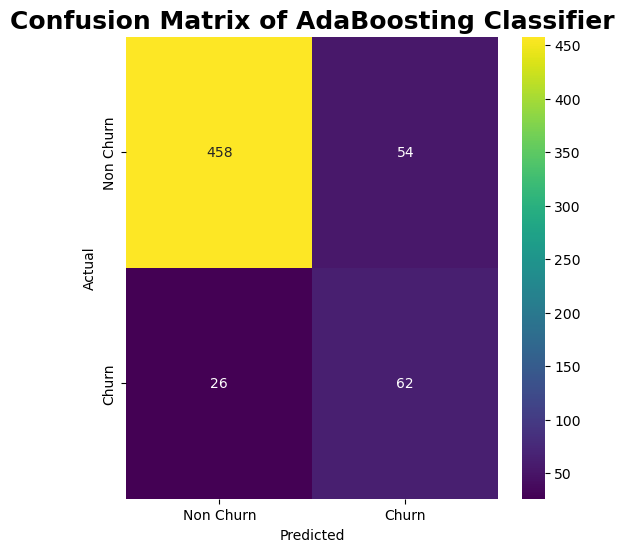

In [9]:
#Build confusion Matrix
cm = confusion_matrix(y_test, y_pred_ada)

#Visualize the Matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d',
            xticklabels=['Non Churn', 'Churn'],
          yticklabels=['Non Churn', 'Churn'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of AdaBoosting Classifier', size=18, color='black', fontweight= 'bold')
plt.show()

EVALUATION OF THE MACHINE LEARNING ALGORITHMS
-----

In [10]:
final_data = pd.DataFrame({"ALGORITHMS":["AdaBoosting Classifier"], 
                           "ACCURACY":[accuracy_score(y_test, y_pred_ada)*100],
                         "PRECISION":[precision_score(y_test, y_pred_ada)*100],
                          "RECALL":[recall_score(y_test, y_pred_ada)*100],
                          "F1_SCORE":[f1_score(y_test, y_pred_ada)*100], 
                            "ROC_AUC":[roc_auc_score(y_test, y_pred_ada)*100], 
                           
                        })

final_data

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE,ROC_AUC
0,AdaBoosting Classifier,86.666667,53.448276,70.454545,60.784314,79.953835


K_FOLD CROSS VALIDATION
-----

ACCURACY
---------

In [11]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ada_accuracies = cross_val_score(ada, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')
print(ada_accuracies)
ada_avg_accuracy = np.mean(ada_accuracies)
ada_std_accuracy = np.std(ada_accuracies)
print(f"The std score of cross validation using AdaBoosting Classifier algorithm is {ada_std_accuracy * 100:.2f}%")
print(f"The mean score of cross validation using AdaBoosting Classifier algorithm is {ada_avg_accuracy * 100:.2f}%")

[0.89529915 0.87179487 0.8525641  0.8482906  0.88888889 0.87179487
 0.875803   0.88650964 0.87794433 0.89079229]
The std score of cross validation using AdaBoosting Classifier algorithm is 1.49%
The mean score of cross validation using AdaBoosting Classifier algorithm is 87.60%


PRECISION
-------

In [12]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ada_precision = cross_val_score(ada, X_train_resampled, y_train_resampled, cv=kf, scoring='precision')
print(ada_precision)
ada_avg_precision = np.mean(ada_precision)
ada_std_precision = np.std(ada_precision)
print(f"The std score of cross validation using AdaBoosting Classifier algorithm is {ada_std_precision * 100:.2f}%")
print(f"The mean score of cross validation using AdaBoosting Classifier algorithm is {ada_avg_precision * 100:.2f}%")

[0.90393013 0.88839286 0.86343612 0.86547085 0.88888889 0.88839286
 0.88209607 0.90178571 0.89333333 0.9030837 ]
The std score of cross validation using AdaBoosting Classifier algorithm is 1.36%
The mean score of cross validation using AdaBoosting Classifier algorithm is 88.79%


RECALL
----------

In [13]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ada_recall = cross_val_score(ada, X_train_resampled, y_train_resampled, cv=kf, scoring='recall')
print(ada_recall)
ada_avg_recall = np.mean(ada_recall)
ada_std_recall = np.std(ada_recall)
print(f"The std score of cross validation using AdaBoosting Classifier algorithm is {ada_std_recall * 100:.2f}%")
print(f"The mean score of cross validation using AdaBoosting Classifier algorithm is {ada_avg_recall * 100:.2f}%")

[0.88461538 0.85042735 0.83760684 0.82478632 0.88888889 0.85042735
 0.86695279 0.86695279 0.85897436 0.87606838]
The std score of cross validation using AdaBoosting Classifier algorithm is 1.93%
The mean score of cross validation using AdaBoosting Classifier algorithm is 86.06%


F1_SCORE
---------

In [14]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
ada_f1 = cross_val_score(ada, X_train_resampled, y_train_resampled, cv=kf, scoring='f1')
print(ada_f1)
ada_avg_f1 = np.mean(ada_f1)
ada_std_f1 = np.std(ada_f1)
print(f"The std score of cross validation using AdaBoosting Classifier algorithm is {ada_std_f1 * 100:.2f}%")
print(f"The mean score of cross validation using AdaBoosting Classifier algorithm is {ada_avg_f1 * 100:.2f}%")

[0.89416847 0.86899563 0.85032538 0.84463895 0.88888889 0.86899563
 0.87445887 0.88402626 0.87581699 0.88937093]
The std score of cross validation using AdaBoosting Classifier algorithm is 1.56%
The mean score of cross validation using AdaBoosting Classifier algorithm is 87.40%


CHECKING IF IT IS OVERFITTING OR NOT
--------------------

In [15]:
#AdaBoosting Classifier
if ada_avg_accuracy > accuracy:
    print("Model generalizes well: Cross_validation accuracy is higher or close to accuracy")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than accuracy")

Model generalizes well: Cross_validation accuracy is higher or close to accuracy


In [16]:
#AdaBoosting Classifier

if ada_avg_precision > precision:
    print("Model generalizes well: Cross_validation accuracy is higher or close to precision")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than precision")

Model generalizes well: Cross_validation accuracy is higher or close to precision


In [17]:
#AdaBoosting Classifier

if ada_avg_recall > recall:
    print("Model generalizes well: Cross_validation accuracy is higher or close to recall")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than recall")

Model generalizes well: Cross_validation accuracy is higher or close to recall


In [18]:
#AdaBoosting Classifier
if ada_avg_f1 > f1:
    print("Model generalizes well: Cross_validation accuracy is higher or close to f1")
else:
    print("Model might be overfitting: Cross validation accuracy is lower than f1")

Model generalizes well: Cross_validation accuracy is higher or close to f1


TOTAL KFOLD VALIDATION
------

In [19]:
final_kfold = pd.DataFrame({"ALGORITHMS":["AdaBoosting Classifier"], 
                           "ACCURACY":[ada_avg_accuracy * 100],
                         "PRECISION":[ada_avg_precision * 100],
                          "RECALL":[ada_avg_recall * 100],
                          "F1_SCORE":[ada_avg_f1 * 100],  
                           
                        })
final_kfold

,ALGORITHMS,ACCURACY,PRECISION,RECALL,F1_SCORE
0,AdaBoosting Classifier,87.596817,88.788105,86.057005,87.39686
